In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('dfdemocleaned.xlsx', index_col= 0)

## Demographic stuff

In [11]:
demographic_info_columns = ['Country', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASDAGE','avgscore','avgscore_binned']

In [13]:
df_demo = df[demographic_info_columns]

`ASBH02A	GEN\CHILD BORN IN <COUNTRY>\
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>\
ASBH03A	GEN\LANGUAGE<LANGUAGE OF TEST>\
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME\
ASBH15A	GEN\LVL OF EDUCATIONGUARDIAN A\
ASBH15B	GEN\LVL OF EDUCATIONGUARDIAN B\
ASBH16	GEN\LVL OF EDUCATIONCHILD\
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A\
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B\
ASBH18AA	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN A\
ASBH18AB	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN B\
ASBH18BA	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN A\
ASBH18BB	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN B`

## Non-numeric

In [12]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [14]:
france = df_demo[df_demo['Country']=='France']

In [15]:
france.head()

,Country,ASBH02A,ASBH02B,ASBH03A,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,MINAGEARRIVAL,rounded_ages,ASDAGE,avgscore,avgscore_binned
19941,France,Yes,NaN,Yes,1.0,8.0,5.0,5.0,NaN,2.0,1.0,1.0,1.0,1.0,NaN,10.0,9.83,604.451014,"(555.271, 622.517]"
19942,France,Yes,NaN,Yes,1.0,8.0,8.0,6.0,NaN,NaN,1.0,1.0,2.0,1.0,NaN,10.0,10.17,539.765235,"(488.024, 555.271]"
19943,France,Yes,NaN,Yes,1.0,4.0,4.0,2.0,NaN,NaN,1.0,1.0,1.0,3.0,NaN,10.0,10.25,441.943638,"(420.777, 488.024]"
19944,France,Yes,NaN,Yes,1.0,7.0,6.0,5.0,NaN,11.0,1.0,1.0,2.0,1.0,NaN,10.0,10.00,481.787940,"(420.777, 488.024]"
19945,France,Yes,NaN,Yes,1.0,6.0,NaN,4.0,11.0,NaN,1.0,NaN,1.0,2.0,NaN,10.0,10.00,531.800976,"(488.024, 555.271]"


In [16]:
# One-hot encode the categorical variables
france_encoded = pd.get_dummies(france)

In [17]:
france_encoded.head()

,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,MINAGEARRIVAL,rounded_ages,ASDAGE,avgscore,Country_France,ASBH02A_No,ASBH02A_Yes,ASBH02B_3 to 5 years old,ASBH02B_6 to 7 years old,ASBH02B_8 years old or older,ASBH02B_Younger than 3 years old,ASBH03A_No,ASBH03A_Yes,"avgscore_binned_(83.869, 151.789]","avgscore_binned_(151.789, 219.036]","avgscore_binned_(219.036, 286.283]","avgscore_binned_(286.283, 353.53]","avgscore_binned_(353.53, 420.777]","avgscore_binned_(420.777, 488.024]","avgscore_binned_(488.024, 555.271]","avgscore_binned_(555.271, 622.517]","avgscore_binned_(622.517, 689.764]","avgscore_binned_(689.764, 757.011]"
19941,1.0,8.0,5.0,5.0,NaN,2.0,1.0,1.0,1.0,1.0,NaN,10.0,9.83,604.451014,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
19942,1.0,8.0,8.0,6.0,NaN,NaN,1.0,1.0,2.0,1.0,NaN,10.0,10.17,539.765235,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
19943,1.0,4.0,4.0,2.0,NaN,NaN,1.0,1.0,1.0,3.0,NaN,10.0,10.25,441.943638,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
19944,1.0,7.0,6.0,5.0,NaN,11.0,1.0,1.0,2.0,1.0,NaN,10.0,10.00,481.787940,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
19945,1.0,6.0,NaN,4.0,11.0,NaN,1.0,NaN,1.0,2.0,NaN,10.0,10.00,531.800976,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [18]:
# Calculate the correlation matrix
correlation_matrix = france_encoded.corr()

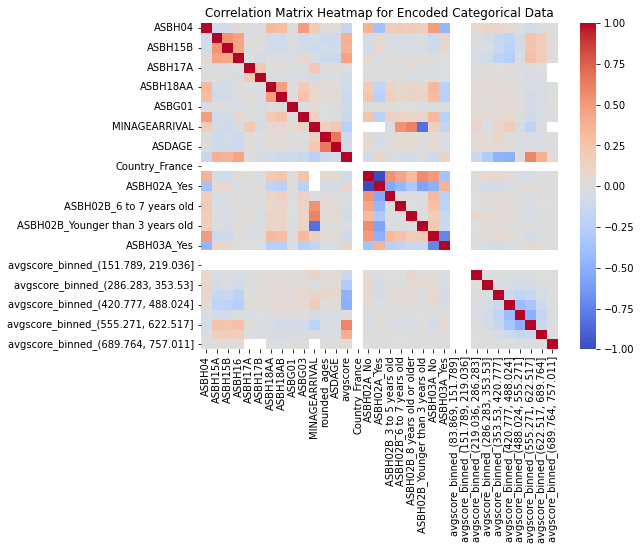

In [20]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Encoded Categorical Data')
plt.show()

In [21]:
# Step 2: Use pd.get_dummies to create dummy variables
dummies = pd.get_dummies(france['ASBH02A'], prefix='ASBH02A')

In [22]:
france_2 = pd.concat([france, dummies], axis=1)


In [23]:
france_2.head()

,Country,ASBH02A,ASBH02B,ASBH03A,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,MINAGEARRIVAL,rounded_ages,ASDAGE,avgscore,avgscore_binned,ASBH02A_No,ASBH02A_Yes
19941,France,Yes,NaN,Yes,1.0,8.0,5.0,5.0,NaN,2.0,1.0,1.0,1.0,1.0,NaN,10.0,9.83,604.451014,"(555.271, 622.517]",0,1
19942,France,Yes,NaN,Yes,1.0,8.0,8.0,6.0,NaN,NaN,1.0,1.0,2.0,1.0,NaN,10.0,10.17,539.765235,"(488.024, 555.271]",0,1
19943,France,Yes,NaN,Yes,1.0,4.0,4.0,2.0,NaN,NaN,1.0,1.0,1.0,3.0,NaN,10.0,10.25,441.943638,"(420.777, 488.024]",0,1
19944,France,Yes,NaN,Yes,1.0,7.0,6.0,5.0,NaN,11.0,1.0,1.0,2.0,1.0,NaN,10.0,10.00,481.787940,"(420.777, 488.024]",0,1
19945,France,Yes,NaN,Yes,1.0,6.0,NaN,4.0,11.0,NaN,1.0,NaN,1.0,2.0,NaN,10.0,10.00,531.800976,"(488.024, 555.271]",0,1


In [ ]:
# Step 4: Use pivot_table to reshape the DataFrame
pivoted_df = france_2.pivot_table(index='ID', values=['Category_A', 'Category_B', 'Category_C'], aggfunc='sum')

ok, one hot encoding is not what I want 